# 1. Import and Install Dependencies

In [94]:
import pyttsx3

# Initialize the TTS engine
tts_engine = pyttsx3.init()

# Test speaking a simple sentence
tts_engine.say("Hello, this is a test of the text-to-speech system.")
tts_engine.runAndWait()


In [95]:
import os
import time
import cv2  # Assuming OpenCV is used for hand detection
import pyttsx3  # Importing the TTS library
from groq import Groq

# Groq API setup
GROQ_API_KEY = "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"

# Initialize Groq client
client = Groq(api_key=GROQ_API_KEY)

# Initialize the TTS engine
tts_engine = pyttsx3.init(driverName='nsss')  # For macOS

# Function to set a seductive female voice
def set_seductive_female_voice(engine):
    voices = engine.getProperty('voices')
    for voice in voices:
        # Modify conditions to select a sultry or seductive voice
        if 'female' in voice.name.lower() or 'samantha' in voice.name.lower():
            engine.setProperty('voice', voice.id)
            break
            
    # Set speech rate (slower for a seductive tone)
    engine.setProperty('rate', 150)  # Adjust this value as needed

    # Set volume (lower for a softer tone)
    engine.setProperty('volume', 0.9)  # Max is 1.0
    engine.setProperty('voice', 'english+f1')
    engine.setProperty('voice', 'english+f2')
    engine.setProperty('voice', 'english+f3')
    engine.setProperty('voice', 'english+f4')
    engine.setProperty('voice', 'english_rp+f3') #my preference
    engine.setProperty('voice', 'english_rp+f4')

# Call the function to set seductive voice
set_seductive_female_voice(tts_engine)

# Function to send the live sentence to Groq API for processing
def send_to_groq_model(sentence):
    try:
        chat_completion = client.chat.completions.create(
            messages=[
                {
                    "role": "user",
                    "content": f"You are assisting with a sign language task. I will provide you with a sequence of words, and your job is to form a coherent, semantically correct sentence while maintaining focus on the words provided. Do not add or remove words. For example, the sentence is -- '{sentence}'. Output just the revised sentence. Ensure that nothing is added beyond the revised sentence, and no extra information is provided, not even 'I'm ready to help' or anything else."
                }
            ],
            model="llama3-8b-8192",
        )
        
        # Return the Groq-processed sentence
        return chat_completion.choices[0].message.content
    
    except Exception as e:
        print(f"Error while processing the sentence: {e}")
        return None

# Function to speak the processed sentence
def speak(text):
    if text:  # Check if text is not None
        tts_engine.say(text)
        tts_engine.runAndWait()  # Wait for the speech to finish

# Example usage: Simulated sentence from OpenCV detection
appended_sentence = "Hello My name Kunal"  # Example sentence from OpenCV detection
processed_sentence = send_to_groq_model(appended_sentence)

# Display the processed sentence and use TTS to speak it
if processed_sentence:
    print(f"Processed Sentence: {processed_sentence}")
    speak(processed_sentence)  # Speak the processed sentence
else:
    print("Failed to process the sentence.")


Processed Sentence: Hello, my name is Kunal.


2024-10-21 20:04:36.392 python[61743:1831263] NSSpeechSynthesizer: [NSSpeechSynthesizer setVoice:] - Voice identifier not found.
2024-10-21 20:04:36.411 python[61743:1831263] NSSpeechSynthesizer: [NSSpeechSynthesizer setVoice:] - Voice identifier not found.
2024-10-21 20:04:36.431 python[61743:1831263] NSSpeechSynthesizer: [NSSpeechSynthesizer setVoice:] - Voice identifier not found.
2024-10-21 20:04:36.454 python[61743:1831263] NSSpeechSynthesizer: [NSSpeechSynthesizer setVoice:] - Voice identifier not found.
2024-10-21 20:04:36.478 python[61743:1831263] NSSpeechSynthesizer: [NSSpeechSynthesizer setVoice:] - Voice identifier not found.
2024-10-21 20:04:36.509 python[61743:1831263] NSSpeechSynthesizer: [NSSpeechSynthesizer setVoice:] - Voice identifier not found.


In [20]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2)
ERROR: No matching distribution found for tensorflow==2.4.1


In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

2024-10-15 11:27:29.042501: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
    #                          mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
    #                          mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
    #                          ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1726202612.869996 5499340 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-22.5.10), renderer: Intel(R) UHD Graphics 617
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1726202613.584465 5509069 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1726202613.880952 5509069 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1726202613.901188 5509070 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1726202613.903857 5509071 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1726202613.957880 5509071 inference_feedback_manager.cc:114] Feedback mana

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_landmarks(frame, results)

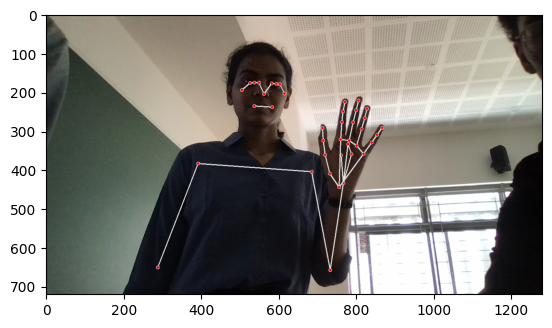

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [9]:
len(results.left_hand_landmarks.landmark)

21

In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [11]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [12]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [13]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [14]:
result_test = extract_keypoints(results)

In [15]:
result_test

array([ 0.439385  ,  0.28480446, -0.34983933, ...,  0.        ,
        0.        ,  0.        ])

In [16]:
np.save('0', result_test)

In [17]:
np.load('0.npy')

array([ 0.439385  ,  0.28480446, -0.34983933, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [18]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('/Users/kunalmohare/Desktop', 'SL_Data')

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [85]:
for action in actions: 
    # List all files, filter only those that can be converted to integers
    dir_list = os.listdir(os.path.join(DATA_PATH, action))
    
    # Filter out any non-integer filenames (e.g., .DS_Store)
    int_dirs = [d for d in dir_list if d.isdigit()]

    # Convert the filtered list to integers and find the max
    if int_dirs:
        dirmax = np.max(np.array(int_dirs).astype(int))
    else:
        dirmax = 0  # Set to 0 if no valid integer directories exist

    for sequence in range(1, no_sequences + 1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax + sequence)))
        except Exception as e:
            print(f"Error creating directory: {e}")
            pass


# 5. Collect Keypoint Values for Training and Testing

In [35]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [55]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [19]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [20]:
label_map = {label:num for num, label in enumerate(actions)}

In [21]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [22]:
sequences, labels = [], []
for action in actions:
    # List all files and filter only those that can be converted to integers
    dir_list = os.listdir(os.path.join(DATA_PATH, action))
    
    # Filter out non-integer filenames (e.g., .DS_Store)
    int_sequences = [d for d in dir_list if d.isdigit()]

    # Iterate over filtered list
    for sequence in np.array(int_sequences).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])


In [23]:
np.array(sequences).shape

(90, 30, 1662)

In [24]:
np.array(labels).shape

(90,)

In [25]:
X = np.array(sequences)

In [26]:
X.shape

(90, 30, 1662)

In [27]:
y = to_categorical(labels).astype(int)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [29]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [31]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [32]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [33]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [43]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

NameError: name 'X_train' is not defined

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 596675 

# 8. Make Predictions

In [35]:
res = model.predict(X_test)

1/1 [==============================] - 1s 967ms/step


In [36]:
actions[np.argmax(res[4])]

'hello'

In [37]:
actions[np.argmax(y_test[4])]

'thanks'

# 9. Save Weights

In [31]:
model.save('Action Detection Model.h5')

In [217]:
del model

In [38]:
model.load_weights('Action Detection Model.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [39]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [40]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 68ms/step


In [41]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [42]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[2, 0],
        [2, 1]],

       [[3, 2],
        [0, 0]]])

In [43]:
accuracy_score(ytrue, yhat)

0.6

# 11. Test in Real Time

In [44]:
from scipy import stats

In [45]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()

    for num, prob in enumerate(res):
        # Assuming prob is an array or scalar, we use float(prob) to ensure it's a scalar
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(float(prob) * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    return output_frame

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1726203278.332629 5499340 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-22.5.10), renderer: Intel(R) UHD Graphics 617
W0000 00:00:1726203278.630687 5529135 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1726203278.696250 5529138 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1726203278.702700 5529136 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1726203278.704945 5529137 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1726203278.714327 5529135 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [139]:
pip install --upgrade opencv-python

Note: you may need to restart the kernel to use updated packages.
